In [1]:
import numpy as np
import pandas as pd
import plotnine as p9
import seaborn as sns
import matplotlib.pyplot as plt
import statistics as stat
import constants

plt.style.use('seaborn-v0_8-colorblind')
import polygraph.input, polygraph.sequence, polygraph.visualize

from Toy_dataset import *

In [2]:
#Defining params
seqnum=100
seqlen=100

In [3]:
seqs1 = RanSequence(seqnum,seqlen,group_name="test",seed=12345,gc_content=0.7)
np.random.seed(12345)
seqs1.save("toy_dataset.txt")
seqs2 = RanSequence(seqnum,seqlen,group_name="random",seed=12345)
np.random.seed(12345)
seqs2.save("toy_dataset2.txt")

In [4]:
seqs1 = polygraph.input.read_seqs("toy_dataset.txt")
seqs2 = polygraph.input.read_seqs("toy_dataset2.txt")

In [ ]:
seqs1['GC Content']=polygraph.sequence.gc(seqs1)
seqs2['GC Content']=polygraph.sequence.gc(seqs2)
seqs=pd.concat([seqs1,seqs2])
seqs

In [ ]:
(p9.ggplot(seqs, p9.aes(x="Group", y="GC Content")) 
 + p9.geom_violin()
 + p9.geom_boxplot(width=0.1, outlier_size=0.05)
 + p9.ggtitle("GC Content vs. Group")
 + p9.theme_classic()
 + p9.theme(axis_text_x=p9.element_text(rotation=90, hjust=1),figure_size=(4,3))
)


In [ ]:
fig,axs = plt.subplots(nrows=2, ncols=1,layout='constrained' )

axs[0].hist(seqs2['GC Content'], bins=78)
axs[0].set_title("50% GC Content")
axs[1].hist(seqs1['GC Content'], bins=70)
axs[1].set_title("70% GC Content")

fig.supxlabel('GC Content]')
fig.supylabel('Count')
plt.show()

#### Testing of uORF counting

<function matplotlib.pyplot.show(close=None, block=None)>

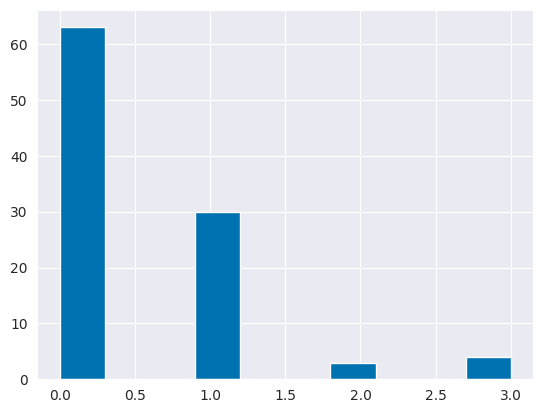

In [6]:
counts=uORF_Statistics.uORFs(seqs1)

plt.hist(counts["uORF_countssum"])
plt.show